<a href="https://colab.research.google.com/github/morreh89/Carrefour-Kenya-unsupervised-learning-techniques/blob/main/part_3_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 3: Association Rules
This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis.

In [2]:
# loading the arules library
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [5]:
df_assoc = read.csv('Supermarket_Sales.csv')
tail(df_assoc)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
7495,pancakes,light mayo,,,,,,,,,,,,,,,,,,NA
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,NA
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,NA
7498,chicken,,,,,,,,,,,,,,,,,,,NA
7499,escalope,green tea,,,,,,,,,,,,,,,,,,NA
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,,,,,,,,,,,,,,,,NA


In [6]:
# Data dimensions
dim(df_assoc)

[1] 7500   20

Checking the data structure

In [7]:
#Structure
str(df_assoc)

'data.frame':	7500 obs. of  20 variables:
 $ shrimp           : chr  "burgers" "chutney" "turkey" "mineral water" ...
 $ almonds          : chr  "meatballs" "" "avocado" "milk" ...
 $ avocado          : chr  "eggs" "" "" "energy bar" ...
 $ vegetables.mix   : chr  "" "" "" "whole wheat rice" ...
 $ green.grapes     : chr  "" "" "" "green tea" ...
 $ whole.weat.flour : chr  "" "" "" "" ...
 $ yams             : chr  "" "" "" "" ...
 $ cottage.cheese   : chr  "" "" "" "" ...
 $ energy.drink     : chr  "" "" "" "" ...
 $ tomato.juice     : chr  "" "" "" "" ...
 $ low.fat.yogurt   : chr  "" "" "" "" ...
 $ green.tea        : chr  "" "" "" "" ...
 $ honey            : chr  "" "" "" "" ...
 $ salad            : chr  "" "" "" "" ...
 $ mineral.water    : chr  "" "" "" "" ...
 $ salmon           : chr  "" "" "" "" ...
 $ antioxydant.juice: chr  "" "" "" "" ...
 $ frozen.smoothie  : chr  "" "" "" "" ...
 $ spinach          : chr  "" "" "" "" ...
 $ olive.oil        : logi  NA NA NA NA NA NA ...

19 columns are factors while 1 is a logical data type

In [8]:
# Summary to show information such as the most purchased items,no. of items purchased in each transaction etc
summary(df_assoc)

    shrimp            almonds            avocado          vegetables.mix    
 Length:7500        Length:7500        Length:7500        Length:7500       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 green.grapes       whole.weat.flour       yams           cottage.cheese    
 Length:7500        Length:7500        Length:7500        Length:7500       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 energy.drink       tomato.juice       low.fat.yogurt      green.tea        
 Length:7500        Length:7500        Length:7500        Length:7500       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    honey              salad           mineral.water         salmon         

Checking for missing values

In [9]:
# Count the missing values
colSums(is.na(df_assoc))

shrimp           almonds           avocado    vegetables.mix 
                0                 0                 0                 0 
     green.grapes  whole.weat.flour              yams    cottage.cheese 
                0                 0                 0                 0 
     energy.drink      tomato.juice    low.fat.yogurt         green.tea 
                0                 0                 0                 0 
            honey             salad     mineral.water            salmon 
                0                 0                 0                 0 
antioxydant.juice   frozen.smoothie           spinach         olive.oil 
                0                 0                 0              7500

Olive oil column has missing values so it will be dropped

In [10]:
# Drop olive oil column from dataframe
df_assoc$olive.oil <- NULL

In [11]:
# Verify that column is successfully dropped
str(df_assoc)

'data.frame':	7500 obs. of  19 variables:
 $ shrimp           : chr  "burgers" "chutney" "turkey" "mineral water" ...
 $ almonds          : chr  "meatballs" "" "avocado" "milk" ...
 $ avocado          : chr  "eggs" "" "" "energy bar" ...
 $ vegetables.mix   : chr  "" "" "" "whole wheat rice" ...
 $ green.grapes     : chr  "" "" "" "green tea" ...
 $ whole.weat.flour : chr  "" "" "" "" ...
 $ yams             : chr  "" "" "" "" ...
 $ cottage.cheese   : chr  "" "" "" "" ...
 $ energy.drink     : chr  "" "" "" "" ...
 $ tomato.juice     : chr  "" "" "" "" ...
 $ low.fat.yogurt   : chr  "" "" "" "" ...
 $ green.tea        : chr  "" "" "" "" ...
 $ honey            : chr  "" "" "" "" ...
 $ salad            : chr  "" "" "" "" ...
 $ mineral.water    : chr  "" "" "" "" ...
 $ salmon           : chr  "" "" "" "" ...
 $ antioxydant.juice: chr  "" "" "" "" ...
 $ frozen.smoothie  : chr  "" "" "" "" ...
 $ spinach          : chr  "" "" "" "" ...


Checking items frequency

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 not logical or factor. Applying default discretization (see '? discretizeDF').”


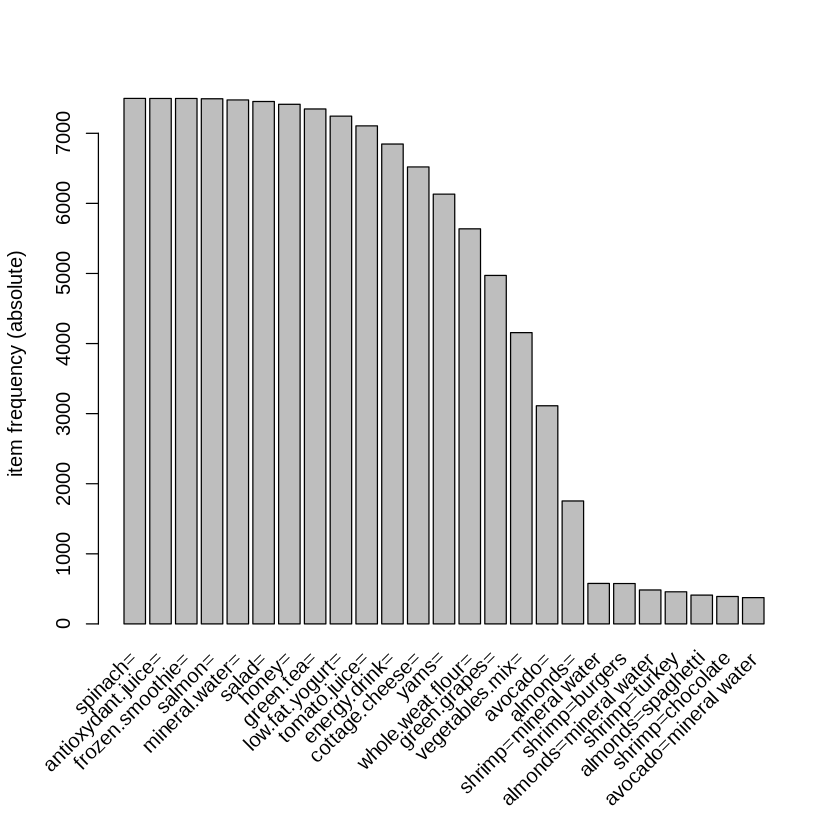

In [16]:
## Create an item frequency plot for the top 25 items
# coerce data frame into transaction. Plotting the dataframe directly fails
trans <- as(df_assoc, "transactions")
# plot item frequency
itemFrequencyPlot(trans,topN=25,type="absolute")

Spinach, antioxydant.juice, frozen.smoothie, salmon, mineral water are the top 5 items in terms of frequency being over 7000. 
Shrimp=chocolate and avocado=mineral water are the lowest

### Run Association rules

In [17]:
install.packages("arules") # For association rules library 
library(arules)
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


Loading required package: grid



In [18]:
df_assoc = read.csv('Supermarket_Sales.csv')
tail(df_assoc)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
7495,pancakes,light mayo,,,,,,,,,,,,,,,,,,NA
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,NA
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,NA
7498,chicken,,,,,,,,,,,,,,,,,,,NA
7499,escalope,green tea,,,,,,,,,,,,,,,,,,NA
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,,,,,,,,,,,,,,,,NA


Confidence is an indication of how often the rule has been found to be true. 
Support is an indication of how frequently the item set appears in the dataset


In [19]:
# Get the rules
rules <- apriori(df_assoc, parameter = list(supp = 0.5, conf = 0.8,target = "rules",minlen=2))
#rules <- sort(rules, by="lift", decreasing=TRUE)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3750 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1280 item(s), 7500 transaction(s)] done [0.05s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(df_assoc, parameter = list(supp = 0.5, conf = 0.8, target = "rules", :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.02s].
writing ... [425218 rule(s)] done [0.12s].
creating S4 object  ... done [0.36s].


Explore the model i.e. the size of rules

In [20]:
summary(rules)

set of 425218 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  204  1478  6576 20134 45002 75943 98616 99417 77848 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   8.000   7.986   9.000  10.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.5541   Min.   :0.8108   Min.   :0.5541   Min.   :1.000  
 1st Qu.:0.5541   1st Qu.:1.0000   1st Qu.:0.5541   1st Qu.:1.001  
 Median :0.6629   Median :1.0000   Median :0.6629   Median :1.021  
 Mean   :0.6455   Mean   :0.9882   Mean   :0.6545   Mean   :1.095  
 3rd Qu.:0.7516   3rd Qu.:1.0000   3rd Qu.:0.7516   3rd Qu.:1.150  
 Max.   :0.9996   Max.   :1.0000   Max.   :0.9997   Max.   :1.508  
     count     
 Min.   :4156  
 1st Qu.:4156  
 Median :4972  
 Mean   :4841  
 3rd Qu.:5637  
 Max.   :7497  

mining info:
     data ntransactions support confidence
 df_assoc          7500     0.5        0.8

Model has 2109165 rules from 7500 transactions if minimum support of 0.04 is specified.

The rules reduce to 425231 when minimum support is increased to 0.5. This is preffered to prevent persistent session crashes due to too many rules.

when minlen=2 parameter is applied to eliminate the products whose LHS is blank, the rules are reduced to 425218

Show top 5 rules

In [21]:
# Show the top 3 rules, but only 2 digits.
#options(digits=2)
inspect(rules[1:20])

     lhs                    rhs                  support   confidence coverage 
[1]  {vegetables.mix=}   => {green.grapes=}      0.5541333 1.0000000  0.5541333
[2]  {green.grapes=}     => {vegetables.mix=}    0.5541333 0.8358809  0.6629333
[3]  {vegetables.mix=}   => {whole.weat.flour=}  0.5541333 1.0000000  0.5541333
[4]  {vegetables.mix=}   => {yams=}              0.5541333 1.0000000  0.5541333
[5]  {vegetables.mix=}   => {cottage.cheese=}    0.5541333 1.0000000  0.5541333
[6]  {vegetables.mix=}   => {energy.drink=}      0.5541333 1.0000000  0.5541333
[7]  {vegetables.mix=}   => {tomato.juice=}      0.5541333 1.0000000  0.5541333
[8]  {vegetables.mix=}   => {low.fat.yogurt=}    0.5541333 1.0000000  0.5541333
[9]  {vegetables.mix=}   => {green.tea=}         0.5541333 1.0000000  0.5541333
[10] {vegetables.mix=}   => {honey=}             0.5541333 1.0000000  0.5541333
[11] {vegetables.mix=}   => {salad=}             0.5541333 1.0000000  0.5541333
[12] {vegetables.mix=}   => {mineral.wat

If someone buys vegetables.mix, they are 100% likely to buy green.grapes too.

If someon buys yams, they are 81% likely to buy green.grapes.